In [88]:
dt <- read.csv("E:\\Study\\Quantitative_Social_Science\\Data\\CAUSALITY\\gay.csv")
dim(dt)
summary(dt)

[1] 69592     4

     study        treatment              wave            ssm       
 Min.   :1.000   Length:69592       Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   Class :character   1st Qu.:2.000   1st Qu.:1.000  
 Median :1.000   Mode  :character   Median :4.000   Median :3.000  
 Mean   :1.149                      Mean   :3.753   Mean   :3.107  
 3rd Qu.:1.000                      3rd Qu.:5.000   3rd Qu.:5.000  
 Max.   :2.000                      Max.   :7.000   Max.   :5.000  

In [89]:
names(dt)

[1] "study"     "treatment" "wave"      "ssm"

In [90]:
print(unique(dt$treatment))

[1] "No Contact"                                    
[2] "Recycling Script by Gay Canvasser"             
[3] "Same-Sex Marriage Script by Gay Canvasser"     
[4] "Recycling Script by Straight Canvasser"        
[5] "Same-Sex Marriage Script by Straight Canvasser"


In [91]:
dt$treatment_recoded <- ifelse(dt$treatment == "No Contact", "NC", ifelse(
    dt$treatment == "Recycling Script by Gay Canvasser", "RGay", ifelse(
        dt$treatment == "Same-Sex Marriage Script by Gay Canvasser", "SGay", ifelse(
            dt$treatment == "Recycling Script by Straight Canvasser", "RStraight", "SStraight"
        )
    )))

## Question 1

In [92]:
baseline_interview <- dt[dt$study == 1 & dt$wave == 1,]
t.test(baseline_interview[baseline_interview$treatment_recoded == "NC",]$ssm, baseline_interview[baseline_interview$treatment_recoded == "SStraight",]$ssm)
t.test(baseline_interview[baseline_interview$treatment_recoded == "NC",]$ssm, baseline_interview[baseline_interview$treatment_recoded == "SGay",]$ssm)
wilcox.test(baseline_interview[baseline_interview$treatment_recoded == "NC",]$ssm, baseline_interview[baseline_interview$treatment_recoded == "SStraight",]$ssm)
wilcox.test(baseline_interview[baseline_interview$treatment_recoded == "NC",]$ssm, baseline_interview[baseline_interview$treatment_recoded == "SGay",]$ssm)


	Welch Two Sample t-test

data:  baseline_interview[baseline_interview$treatment_recoded == "NC", ]$ssm and baseline_interview[baseline_interview$treatment_recoded == "SStraight", ]$ssm
t = -0.99418, df = 1466.6, p-value = 0.3203
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.16930136  0.05541102
sample estimates:
mean of x mean of y 
 3.042764  3.099710 



	Welch Two Sample t-test

data:  baseline_interview[baseline_interview$treatment_recoded == "NC", ]$ssm and baseline_interview[baseline_interview$treatment_recoded == "SGay", ]$ssm
t = 0.32342, df = 1703, p-value = 0.7464
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.08897624  0.12411410
sample estimates:
mean of x mean of y 
 3.042764  3.025195 



	Wilcoxon rank sum test with continuity correction

data:  baseline_interview[baseline_interview$treatment_recoded == "NC", ]$ssm and baseline_interview[baseline_interview$treatment_recoded == "SStraight", ]$ssm
W = 2647196, p-value = 0.2558
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  baseline_interview[baseline_interview$treatment_recoded == "NC", ]$ssm and baseline_interview[baseline_interview$treatment_recoded == "SGay", ]$ssm
W = 3038051, p-value = 0.6659
alternative hypothesis: true location shift is not equal to 0


As can be seen, especially from the results of Wilcox test (as it is more suitable for ordered discrete data than t test), there's no significant difference among these three pre-treatment groups, which indicates that the randomization was propbably properly conducted.

Given that we need to test difference of a discrete variable among three groups, we can also use Chi-sq test. 

In [93]:
chisq.test(baseline_interview$treatment_recoded, baseline_interview$ssm)


	Pearson's Chi-squared test

data:  baseline_interview$treatment_recoded and baseline_interview$ssm
X-squared = 14.25, df = 16, p-value = 0.5801


## Question 2

In [94]:
summary(dt)

     study        treatment              wave            ssm       
 Min.   :1.000   Length:69592       Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   Class :character   1st Qu.:2.000   1st Qu.:1.000  
 Median :1.000   Mode  :character   Median :4.000   Median :3.000  
 Mean   :1.149                      Mean   :3.753   Mean   :3.107  
 3rd Qu.:1.000                      3rd Qu.:5.000   3rd Qu.:5.000  
 Max.   :2.000                      Max.   :7.000   Max.   :5.000  
 treatment_recoded 
 Length:69592      
 Class :character  
 Mode  :character  
                   
                   
                   

In [95]:
two_months_after <- dt[dt$study == 1 & dt$wave == 2, ] 

dif_nc <- mean(two_months_after[two_months_after$treatment_recoded == 'NC', ]$ssm) - mean(baseline_interview[baseline_interview$treatment_recoded == 'NC', ]$ssm)

ATE_straight <- mean(two_months_after[two_months_after$treatment_recoded == 'SStraight', ]$ssm) - mean(baseline_interview[baseline_interview$treatment_recoded == 'SStraight', ]$ssm) - dif_nc
ATE_gay <- mean(two_months_after[two_months_after$treatment_recoded == 'SGay', ]$ssm) - mean(baseline_interview[baseline_interview$treatment_recoded == 'SGay', ]$ssm) - dif_nc

print(paste("The ATE of Straight group is ", ATE_straight))
print(paste("The ATE of Gay group is ", ATE_gay))

[1] "The ATE of Straight group is  0.0653027968500943"
[1] "The ATE of Gay group is  0.117443565180214"


The difference indicates that the effect of canvassing was better (almost twice) when the canvasser was gay.

## Question 3

In [96]:
ATE_straight <- mean(two_months_after[two_months_after$treatment_recoded == 'RStraight', ]$ssm) - mean(baseline_interview[baseline_interview$treatment_recoded == 'RStraight', ]$ssm) - dif_nc
ATE_gay <- mean(two_months_after[two_months_after$treatment_recoded == 'RGay', ]$ssm) - mean(baseline_interview[baseline_interview$treatment_recoded == 'RGay', ]$ssm) - dif_nc

print(paste("The ATE of Straight group is ", ATE_straight))
print(paste("The ATE of Gay group is ", ATE_gay))

[1] "The ATE of Straight group is  -0.00604656696954109"
[1] "The ATE of Gay group is  -0.0203784820222062"


This is for proving the machenism that caused the differences when the texts were same-sex:
- if the differences when the texts were same-sex are smaller, then the cause of ATE differences when the texts were same-sex is propbably a combination of the gender of canvassers and the texts.
- if the differences when the texts were same-sex are similar, then the ATE differences when the texts were same-sex are propbably mainly caused by contact, which means that contact can decrease out-group hostility.

## Question 4

In [97]:
# Define a function which is to calculate the 4 ATEs -
# that of SStraight, SGay, RStraight and RGay
cal_ate <- function(wave){
    treated_result <- dt[dt$study == 1 & dt$wave == wave, ]

    dif_nc <- mean(treated_result[treated_result$treatment_recoded == 'NC', ]$ssm) - mean(baseline_interview[baseline_interview$treatment_recoded == 'NC', ]$ssm)

    s_ATE_straight <- mean(treated_result[treated_result$treatment_recoded == 'SStraight', ]$ssm) - mean(baseline_interview[baseline_interview$treatment_recoded == 'SStraight', ]$ssm) - dif_nc
    s_ATE_gay <- mean(treated_result[treated_result$treatment_recoded == 'SGay', ]$ssm) - mean(baseline_interview[baseline_interview$treatment_recoded == 'SGay', ]$ssm) - dif_nc
    r_ATE_straight <- mean(treated_result[treated_result$treatment_recoded == 'RStraight', ]$ssm) - mean(baseline_interview[baseline_interview$treatment_recoded == 'RStraight', ]$ssm) - dif_nc
    r_ATE_gay <- mean(treated_result[treated_result$treatment_recoded == 'RGay', ]$ssm) - mean(baseline_interview[baseline_interview$treatment_recoded == 'RGay', ]$ssm) - dif_nc

    return(c(s_ATE_straight, s_ATE_gay, r_ATE_straight, r_ATE_gay))
}

df <- data.frame(index = c("SStraight", "SGay", "RStraight", "RGay"))

for (i in seq(2, 7, 1)){
    df[ ,paste("wave", i, sep = '')] <- cal_ate(wave = i)
}

print(df)

      index        wave2        wave3      wave4       wave5        wave6
1 SStraight  0.065302797  0.003462833 0.03025142  0.04161006  0.006570065
2      SGay  0.117443565  0.098935055 0.11019470  0.16546436  0.104004413
3 RStraight -0.006046567 -0.052961949 0.01645350 -0.07624599 -0.026097285
4      RGay -0.020378482  0.004057905 0.01158062 -0.01001297  0.022029981
        wave7
1 -0.09948238
2  0.07693728
3 -0.11848799
4  0.02998649


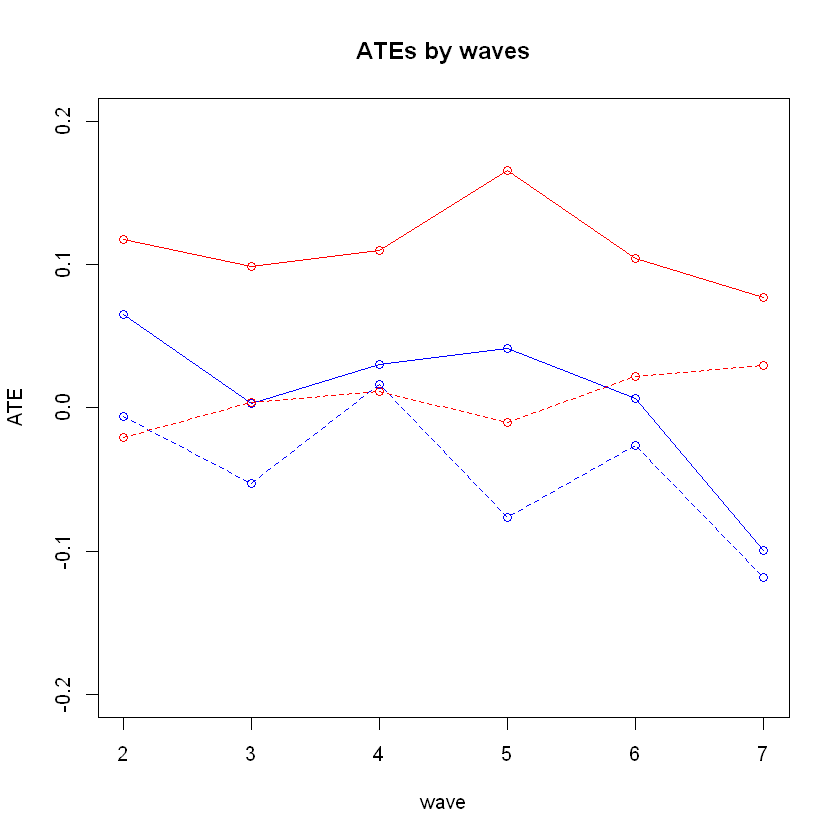

In [98]:
SS <- as.numeric(df[1, 2:7])
SG <- as.numeric(df[2, 2:7])
RS <- as.numeric(df[3, 2:7])
RG <- as.numeric(df[4, 2:7])

plot(2:7, SS, type = 'o', col = 'blue', xlab = "wave", ylab = "ATE",
    main = "ATEs by waves", ylim = c(-0.2, 0.2))
lines(2:7, SG, type = 'o', col = "red")
lines(2:7, RS, type = "o", col = "blue", lty = 2)
lines(2:7, RG, type = "o", col = "red", lty = 2)


Before wave 4, the ATE differences are mainly caused by the texts (the ATEs of RS and RG are all near 0). While after wave 5, the ATE differences are, at least partly, caused by the gender of the canvassers.

## Question 5

In [99]:
study2 <- dt[dt$study == 2,]

t.test(study2[study2$wave == 1 & study2$treatment_recoded == "SGay", ]$ssm, 
    study2[study2$wave == 1 & study2$treatment_recoded == "NC", ]$ssm)



	Welch Two Sample t-test

data:  study2[study2$wave == 1 & study2$treatment_recoded == "SGay", ]$ssm and study2[study2$wave == 1 & study2$treatment_recoded == "NC", ]$ssm
t = 0.024316, df = 2436.5, p-value = 0.9806
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1317153  0.1350229
sample estimates:
mean of x mean of y 
 2.971729  2.970075 


According the baseline results of these two studies, I believe that the sampling of study 2 was randomly conducted. Because the mean of two groups are very close to each other, and there're no difference between treatment groups in both studies.

## Question 6

In [108]:
study2wave1 <- study2[study2$wave == 1, ]
study2wave2 <- study2[study2$wave == 2, ]

dif_nc <- mean(study2wave2[study2wave2$treatment_recoded == "NC", ]$ssm) - mean(study2wave1[study2wave1$treatment_recoded == "NC", ]$ssm)
dif_sgay <- mean(study2wave2[study2wave2$treatment_recoded == "SGay", ]$ssm) - mean(study2wave1[study2wave1$treatment_recoded == "SGay", ]$ssm)

ate <- dif_sgay - dif_nc
print(paste("The ATE of study 2 wave 2 SGay group is", ate))


[1] "The ATE of study 2 wave 2 SGay group is 0.12223989129479"


Since 0.122 seems to be similar with 0.117, we believe that the results are consistent.

In [114]:
x = c()

for (i in c(2, 3, 4, 7)){
    study2wavei <- study2[study2$wave == i, ]
    dif_nc <- mean(study2wavei[study2wavei$treatment_recoded == "NC", ]$ssm) - mean(study2wave1[study2wave1$treatment_recoded == "NC", ]$ssm)
    dif_sgay <- mean(study2wavei[study2wavei$treatment_recoded == "SGay", ]$ssm) - mean(study2wave1[study2wave1$treatment_recoded == "SGay", ]$ssm)
    x = c(x, dif_sgay - dif_nc)
}

x <- append(x, c(0, 0), after = 3) # there're no results in wave 4 and 5 in study 2
x

[1] 0.1222399 0.1487668 0.1235200 0.0000000 0.0000000 0.3054089

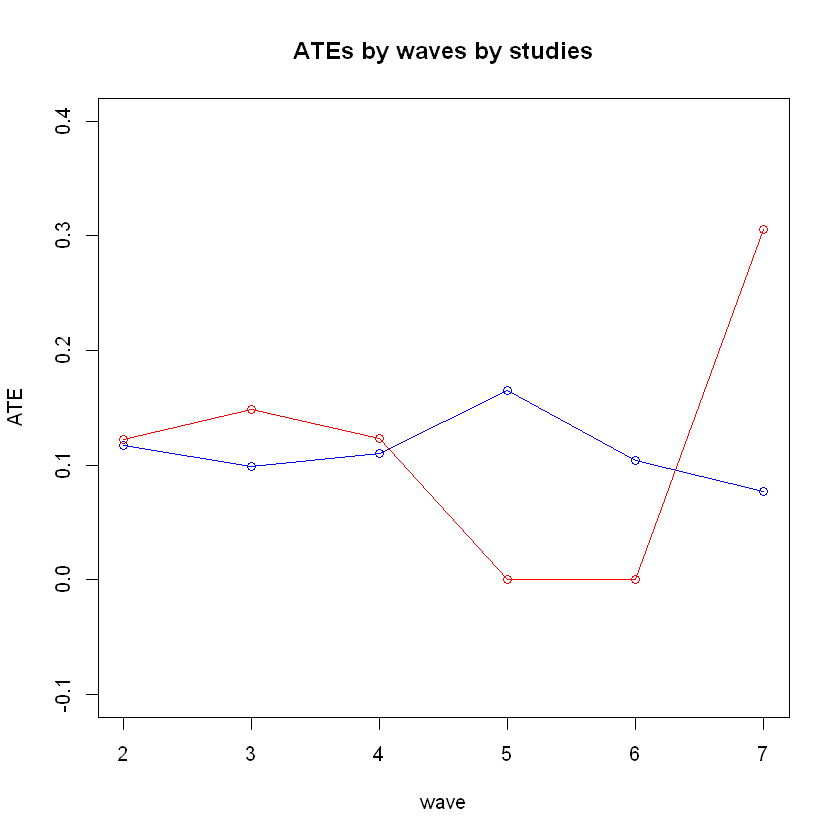

In [116]:
# plot the results together with those in study 1
plot(2:7, SG, type = 'o', col = 'blue', xlab = "wave", ylab = "ATE",
    main = "ATEs by waves by studies", ylim = c(-0.1, 0.4))
lines(2:7, x, type = 'o', col = 'red')

Without considering the results of wave 4 and 5, the treatment effects in study 2 seem to be more persistent, which even go much higher after one year.